In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],
                   [6.182],[7.59],[2.167],[7.042],[10.791],[5.313],
                   [7.997],[3.1]], dtype = np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],
                   [2.597],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],
                   [1.3]], dtype = np.float32)

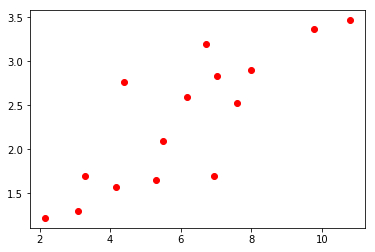

In [3]:
plt.plot(x_train, y_train, 'ro', label="original data")
plt.show()

In [4]:
import torch

In [5]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [8]:
input_size = 1
hidden_size =100
output_size = 1
learning_rate = 1e-6

In [9]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 100])

In [10]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([100, 1])

In [11]:
for iter in range(1,301):
    y_pred = x_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 2251.31640625
100 34.8457145690918
150 4.13388729095459
200 3.641319513320923
250 3.6334121227264404
300 3.6332826614379883


In [12]:
print(w1)

tensor([[ 9.2902e-01, -1.2217e-02,  5.2535e-02,  7.3328e-01,  7.3682e-01,
          3.4534e-01,  6.5180e-01,  5.9065e-01,  4.9595e-01,  4.0045e-01,
          1.4046e-01,  4.5193e-01,  3.0645e-01,  1.9284e-01, -6.5539e-04,
         -1.5443e-05,  7.3595e-01,  7.2434e-01,  1.9988e-01,  1.7139e-01,
         -5.7774e-04,  8.2744e-01,  5.8846e-01, -6.0307e-03,  5.5332e-01,
          1.5791e-01,  7.1450e-01,  4.4222e-01,  2.7038e-01,  8.4266e-02,
          5.1498e-01,  4.7013e-01,  6.3092e-01,  6.6839e-01,  5.7964e-01,
         -7.4023e-03, -1.5225e-03,  7.9285e-01, -3.7651e-03,  6.3053e-01,
          9.6797e-01,  4.1265e-01,  2.5405e-01, -2.2029e-03,  1.8268e-01,
          1.1121e+00,  2.4432e-01,  2.6165e-02, -2.4765e-03, -1.0508e-02,
          1.0141e+00, -1.1215e-03, -4.7385e-03,  2.5411e-01,  5.9991e-01,
          1.2865e-02,  4.6241e-01,  6.0641e-01,  5.1368e-01,  4.1805e-01,
         -9.2238e-03,  3.3816e-01,  9.7504e-01,  4.6294e-01,  1.0437e-01,
          3.5588e-01,  7.3028e-01,  4.

In [13]:
print('w2',w2)

w2 tensor([[-0.3810],
        [ 0.9184],
        [ 0.7504],
        [-0.2132],
        [-0.3363],
        [ 0.4751],
        [-0.1298],
        [ 0.3481],
        [-0.0850],
        [ 0.3715],
        [ 0.0819],
        [ 0.3148],
        [ 0.5731],
        [ 0.2088],
        [ 0.7459],
        [ 0.3706],
        [-0.2549],
        [-0.1716],
        [ 0.0593],
        [-0.0050],
        [ 0.6776],
        [ 0.0552],
        [ 0.4487],
        [ 0.5730],
        [ 0.0628],
        [-0.0121],
        [-0.3412],
        [ 0.6079],
        [-0.0430],
        [ 0.6556],
        [ 0.1029],
        [ 0.5275],
        [-0.0902],
        [-0.3076],
        [ 0.5088],
        [ 0.6460],
        [ 0.5957],
        [ 0.0968],
        [ 0.4265],
        [-0.2392],
        [-0.2518],
        [-0.1759],
        [ 0.5077],
        [ 0.9875],
        [ 0.2997],
        [-0.5148],
        [ 0.0684],
        [ 0.4973],
        [ 0.6788],
        [ 0.8830],
        [-0.3399],
        [ 0.2298],
        [

In [15]:
x_train_tensor = x_train
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [16]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2117],
        [1.6156],
        [2.0195],
        [2.4638],
        [2.5446],
        [1.5304],
        [3.5907],
        [2.2699],
        [2.7869],
        [0.7957],
        [2.5857],
        [3.9623],
        [1.9508],
        [2.9363],
        [1.1383]], grad_fn=<MmBackward>)

In [17]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.211698 ],
       [1.615597 ],
       [2.0194964],
       [2.4637864],
       [2.5445662],
       [1.5304112],
       [3.5906658],
       [2.2699153],
       [2.7869067],
       [0.7956817],
       [2.58569  ],
       [3.9622536],
       [1.9508328],
       [2.936348 ],
       [1.138262 ]], dtype=float32)

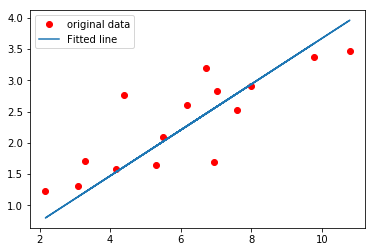

In [19]:
x_train = x_train.detach().numpy()
y_train = y_train.detach().numpy()
plt.plot(x_train, y_train, 'ro', label="original data")
plt.plot(x_train, predicted, label="Fitted line")

plt.legend()
plt.show()